# dSprites - Disentanglement testing Sprites dataset (Loader)

**Author**: Maleakhi A. Wijaya

**Description**: This notebook contains the following:
- dSprites loader functions
- data exploration results

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Mount drive
# from google.colab import drive
# drive.mount('/content/drive')

## Loader Functions

Contains helper functions related to dataset loader and exploration.

In [ ]:
def get_latent_sizes():
    """
    Get the size of each concept (possible values of each class).
    """
    
    return np.array([1, 3, 6, 40, 32, 32])

def get_latent_bases():
    """
    Given vector (x, y, z) where each dimension is in base (a, b, c).
    The following function will convert each of (x, y, z) dimensions to decimal.
    """
    
    latent_sizes = get_latent_sizes()
    latent_bases = np.concatenate((latent_sizes[::-1].cumprod()[::-1][1:],
                                np.array([1,])))
    
    return latent_bases

In [ ]:
def sample_latent(size=1):
    """
    Used to randomly sample latent of size 'size'. Randomly sample data of size 
    'size'.

    :param size: how many random samples
    
    :return: sample of 'size' latents
    """
    
    latents_sizes = get_latent_sizes()
    samples = np.zeros((size, len(latents_sizes)))
    for lat_i, lat_size in enumerate(latents_sizes):
        samples[:, lat_i] = np.random.randint(lat_size, size=size)

    return samples

In [ ]:
def latent_to_index(latents):
    """
    Convert from given latent to index position of it in the dataset.

    :param latents: array of latent
    
    :return: list of indices
    """
    
    latents_bases = get_latent_bases()
    return np.dot(latents, latents_bases).astype(int)

In [ ]:
def show_images_grid(imgs_, num_images=25):
    """
    Used to visualise dSprite image in a grid.

    :param imgs_: images to be drawn
    :param num_images: number of images shown in the grid
    """
    
    ncols = int(np.ceil(num_images**0.5))
    nrows = int(np.ceil(num_images / ncols))
    _, axes = plt.subplots(ncols, nrows, figsize=(nrows * 2, ncols * 2))
    axes = axes.flatten()
    
    # Draw images on the given grid
    for ax_i, ax in enumerate(axes):
        if ax_i < num_images:
            ax.imshow(imgs_[ax_i], cmap='Greys_r',  interpolation='nearest')
            ax.set_xticks([])
            ax.set_yticks([])
        else:
            ax.axis('off')

In [ ]:
def load_dsprites(path, dataset_size_used, train_size=0.85, class_index=1):
    """
    Load dSprites dataset, split into train, validation, and test sets.

    :param path: the path of the dataset
    :param dataset_size_used: how many instances we will load into RAM
    :param train_size: size of the training set
    :param class_index: 1 for shape

    :return" x_train, x_test, y_train, y_test, c_train, c_test
    """

    # Load dataset
    dataset_zip = np.load(path)

    # Extract relevant datas from the zip file
    imgs = dataset_zip["imgs"] # contains image data (737280 x 64 x 64)
    latents_values = dataset_zip['latents_values'] # values of latent factors (or in this case concepts)
    latents_classes = dataset_zip['latents_classes'] # classification targets (integer index of latents_values)

    # Select data that will be used
    indices_sampled = np.random.randint(0, imgs.shape[0], dataset_size_used)
    X = np.expand_dims(imgs, axis=-1).astype(('float32'))
    y = latents_classes[:, class_index] # shape for task 1
    c = latents_classes # concepts
    X = X[indices_sampled]
    y = y[indices_sampled]
    c = c[indices_sampled]

    # Split X (image), y (shape for task 1), concepts to train test sets
    x_train, x_test, y_train, y_test, c_train, c_test = train_test_split(X, y, c, train_size=train_size)
    print('Training samples:', x_train.shape[0])
    print('Testing samples:', x_test.shape[0])

    return x_train, x_test, y_train, y_test, c_train, c_test

## Loading and Exploring dSprites

In this section, we will load and visualise the dSprite datasets.

### Load dataset

In [ ]:
# Load dataset, split into train test
path = 'drive/MyDrive/dsprites_ndarray_co1sh3sc6or40x32y32_64x64.npz'
x_train, x_test, y_train, y_test, c_train, c_test = load_dsprites(path, 200000, train_size=0.85, class_index=1)

# Split training into validation set as well
x_train, x_valid = x_train[:150000], x_train[150000:]
y_train, y_valid = y_train[:150000], y_train[150000:]
c_train, c_valid = c_train[:150000], c_train[150000:]

Training samples: 85000
Testing samples: 15000


### Visualise examples

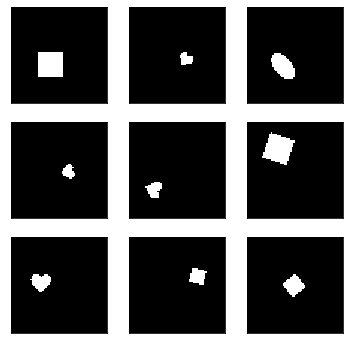

In [ ]:
# Randomly sample some latents (from the dataset)
latents_sampled = sample_latent(size=49)

# Select images
imgs_sampled = x_train[:10].reshape(-1, 64, 64)

# Show images
show_images_grid(imgs_sampled, num_images=9)